In [1]:
import pywt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from modwt import modwt, modwtmra
from sklearn import preprocessing
import pmdarima

In [2]:
df = pd.read_csv('/Users/andyliu/develop/andy/data_processing/SPY_indicators.csv')

In [3]:
data = df['close']

In [4]:
train_n = data.shape[0]*4//5
train = np.array(data[:train_n])
test = np.array(data[train_n:])

In [5]:
wt = modwt(data, 'db2', 6)
c = modwtmra(wt, 'db2')

In [6]:
detail = c[:6]
smooth = c[6]

In [7]:
smooth_test = smooth[train_n:]
smooth_train = smooth[:train_n]
detail_train = []
detail_test = []
for i in range(len(detail)):
    detail_train.append(detail[i][:train_n])
    detail_test.append(detail[i][train_n:])

In [8]:
from pmdarima.arima import ndiffs

In [9]:
def num_diffs(y_train):
    kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
    adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
    n_diffs = max(adf_diffs, kpss_diffs)
    return(n_diffs)

In [10]:
smooth_auto = pmdarima.auto_arima(smooth_train, d=num_diffs(smooth_train), seasonal=False, stepwise=True, suppress_warnings=True, max_p=20, trace=2, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-12576.440, Time=0.22 sec
First viable model found (-12576.440)
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-15131.412, Time=1.49 sec
New best model found (-15131.412 < -12576.440)
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-12572.943, Time=2.53 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-15168.345, Time=6.41 sec
New best model found (-15168.345 < -15131.412)
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-15192.433, Time=2.70 sec
New best model found (-15192.433 < -15168.345)
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-15180.074, Time=3.24 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=-15206.018, Time=3.08 sec
New best model found (-15206.018 < -15192.433)
 ARIMA(4,3,1)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(4,3,0)(0

In [11]:
smooth_auto.order

(7, 3, 0)

In [12]:
detail_models = []

In [13]:
for detail_series in detail_train:
    detail_auto = pmdarima.auto_arima(detail_series, d=num_diffs(detail_series), seasonal=False, stepwise=True, suppress_warnings=True, max_p=6, trace=2, error_action='ignore')
    detail_models.append(detail_auto)

Performing stepwise search to minimize aic
Near non-invertible roots for order (2, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=6.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3519.745, Time=0.03 sec
First viable model found (3519.745)
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3337.007, Time=0.16 sec
New best model found (3337.007 < 3519.745)
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2992.008, Time=0.94 sec
New best model found (2992.008 < 3337.007)
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2770.137, Time=1.57 sec
New best model found (2770.137 < 2992.008)
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2610.371, Time=3.06 sec
New best model found (26

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11028.141, Time=5.92 sec
First viable model found (-11028.141)
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=413.302, Time=0.53 sec
Near non-invertible roots for order (1, 1, 0)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=2.24 sec
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=411.302, Time=0.09 sec
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11115.535, Time=10.42 sec
New best model found (-11115.535 < -11

In [14]:
detail_models

[ARIMA(order=(6, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(6, 1, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False)]

In [15]:
def arima_train(train, test, arima, max_p):
    trainorder = arima.order
    tot = len(test)
    history = [x for x in train]
    predictions = []
    for t in range(tot):
        try:
            print(str(t+1) + "/" + str(tot))
            arima.fit(history)
            yhat = arima.predict()[0]
            predictions.append(yhat)
            history.append(test[t])
            
        except Exception:
            print("Relocating ARIMA Parameters...")
            arima = pmdarima.auto_arima(history, d = num_diffs(history), seasonal=False, stepwise=True, suppress_warnings=True, max_p=max_p, trace=2, error_action='ignore')
            arima.fit(history)
            yhat = arima.predict()[0]
            predictions.append(yhat)
            history.append(test[t])
            
    return(predictions)

In [50]:
smooth_pred = arima_train(smooth_train, smooth_test, smooth_auto, 15)

1/247
2/247
3/247
4/247
5/247
6/247
7/247
Relocating ARIMA Parameters...
Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-12656.288, Time=0.10 sec
First viable model found (-12656.288)
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-15220.058, Time=0.08 sec
New best model found (-15220.058 < -12656.288)
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-12654.269, Time=0.82 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-15262.651, Time=0.25 sec
New best model found (-15262.651 < -15220.058)
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=-15279.606, Time=0.84 sec
New best model found (-15279.606 < -15262.651)
 ARIMA(4,3,0)(0,0,0)[0]             : AIC=-15357.608, Time=0.17 sec
New best model found (-15357.608 < -15279.606)
 ARIMA(5,3,0)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(4,3,1)(0,0,0)[0]             : AIC=-15408.111, Time=0.78 sec
New best model found (-15408.111 < -15357.608)
 ARIMA(3,3,1)(0

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py:4161: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)


Relocating ARIMA Parameters...
Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-12804.581, Time=0.14 sec
First viable model found (-12804.581)
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-15423.604, Time=0.13 sec
New best model found (-15423.604 < -12804.581)
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-12800.952, Time=0.23 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=nan, Time=0.69 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-15453.185, Time=0.30 sec
New best model found (-15453.185 < -15423.604)
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=nan, Time=0.82 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-15492.642, Time=0.44 sec
New best model found (-15492.642 < -15453.185)
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-13703.257, Time=0.33 sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=-15580.445, Time=0.16 sec
New best model found (-15580.445 < -15492.642)
 ARIMA(0,3,3)(0,0,0)[0]             : AIC=

 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-15848.483, Time=0.26 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=-13115.450, Time=0.59 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=-15985.862, Time=0.43 sec
New best model found (-15985.862 < -15900.368)
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(3,3,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(2,3,4)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,3,4)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(3,3,4)(0,0,0)[0]             : AIC=-15726.691, Time=0.38 sec
 ARIMA(2,3,3)(0,0,0)[0] intercept   : AIC=-15997.796, Time=1.07 sec
New best model found (-15997.796 < -15985.862)
 ARIMA(1,3,3)(0,0,0)[0] intercept   : AIC=-15967.571, Time=0.51 sec
 ARIMA(2,3,2)(0,0,0)[0] intercept   : AIC=-15964.359, Time=0.40 sec
 ARIMA(3,3,3)(0,0,0)[0] intercept   : AIC=-15979.999, Time=0.52 sec
 ARIMA(2,3,4)(0,0,0)[0] intercept   : AIC=-16017.421, Time=1.28 sec
New best model found (-16017.421 < -15997.796)
 ARIMA(

 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-13355.378, Time=0.52 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=nan, Time=0.56 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-16182.912, Time=0.14 sec
New best model found (-16182.912 < -16162.340)
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=nan, Time=0.70 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-16220.725, Time=0.28 sec
New best model found (-16220.725 < -16182.912)
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=nan, Time=0.74 sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=-16318.222, Time=0.17 sec
New best model found (-16318.222 < -16220.725)
 ARIMA(0,3,3)(0,0,0)[0]             : AIC=-13350.622, Time=1.48 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=-16343.356, Time=0.88 sec
New best model found (-16343.356 < -16318.222)
 ARIMA(3,3,3)(0,0,0)[0]             : AIC=-16361.850, Time=0.38 sec
New best model found (-16361.850 < -16343.356)
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=-13347.117, Time=1.10 sec
 ARIMA(4,3,3)(0,0,0)[0]             : 

 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-13452.741, Time=4.14 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-16345.171, Time=1.79 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=nan, Time=3.02 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=-13443.634, Time=2.87 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=-16467.085, Time=0.79 sec
New best model found (-16467.085 < -16386.178)
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=-16452.856, Time=2.08 sec
 ARIMA(3,3,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(2,3,4)(0,0,0)[0]             : AIC=-16507.419, Time=3.58 sec
New best model found (-16507.419 < -16467.085)
 ARIMA(1,3,4)(0,0,0)[0]             : AIC=-16491.179, Time=1.39 sec
 ARIMA(3,3,4)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(2,3,5)(0,0,0)[0]             : AIC=-16512.310, Time=2.40 sec
New best model found (-16512.310 < -16507.419)
 ARIMA(1,3,5)(0,0,0)[0]             : AIC=-16535.402, Time=5.18 sec
New best model found (-16535.402 < -16512.310)
 ARIMA(0,3,5)(0,0,0

225/247
226/247
227/247
228/247
229/247
230/247
231/247
232/247
233/247
234/247
235/247
236/247
237/247
238/247
239/247
240/247
241/247
242/247
243/247
244/247
245/247
246/247
247/247


In [51]:
detail_pred = []
for i in range(len(detail_models)):
    d = arima_train(detail_train[i], detail_test[i], detail_models[i], 5)
    detail_pred.append(d)

1/247
2/247
3/247
4/247
5/247
6/247
7/247
8/247
9/247
10/247
11/247
12/247
13/247
14/247
15/247
16/247
17/247
18/247
19/247
20/247
21/247
22/247
23/247
24/247
25/247
26/247
27/247
28/247
29/247
30/247
31/247
32/247
33/247
34/247
35/247
36/247
37/247
38/247
39/247
40/247
41/247
42/247
43/247
44/247
45/247
46/247
47/247
48/247
49/247
50/247
51/247
52/247
53/247
54/247
55/247
56/247
57/247
58/247
59/247
60/247
61/247
62/247
63/247
64/247
65/247
66/247
67/247
68/247
69/247
70/247
71/247
72/247
73/247
74/247
75/247
76/247
77/247
78/247
79/247
80/247
81/247
82/247
83/247
84/247
85/247
86/247
87/247
88/247
89/247
90/247
91/247
92/247
93/247
94/247
95/247
96/247
97/247
98/247
99/247
100/247
101/247
102/247
103/247
104/247
105/247
106/247
107/247
108/247
109/247
110/247
111/247
112/247
113/247
114/247
115/247
116/247
117/247
118/247
119/247
120/247
121/247
122/247
123/247
124/247
125/247
126/247
127/247
128/247
129/247
130/247
131/247
132/247
133/247
134/247
135/247
136/247
137/247
138/247
139/

108/247
109/247
110/247
111/247
112/247
113/247
114/247
115/247
116/247
117/247
118/247
119/247
120/247
121/247
122/247
123/247
124/247
125/247
126/247
127/247
128/247
129/247
130/247
131/247
132/247
133/247
134/247
135/247
136/247
137/247
138/247
139/247
140/247
141/247
142/247
143/247
144/247
145/247
146/247
147/247
148/247
149/247
150/247
151/247
152/247
153/247
154/247
155/247
156/247
157/247
158/247
159/247
160/247
161/247
162/247
163/247
164/247
165/247
166/247
167/247
168/247
169/247
170/247
171/247
172/247
173/247
174/247
175/247
176/247
177/247
178/247
179/247
180/247
181/247
182/247
183/247
184/247
185/247
186/247
187/247
188/247
189/247
190/247
191/247
192/247
193/247
194/247
195/247
196/247
197/247
198/247
199/247
200/247
201/247
202/247
203/247
204/247
205/247
206/247
207/247
208/247
209/247
210/247
211/247
212/247
213/247
214/247
215/247
216/247
217/247
218/247
219/247
220/247
221/247
222/247
223/247
224/247
225/247
226/247
227/247
228/247
229/247
230/247
231/247
232/247


In [52]:
pred = np.array(smooth_pred)
for i in detail_pred:
    pred += np.array(i)

In [53]:
actual = test

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [60]:
actual = scaler.fit_transform(np.array(actual).reshape(-1,1))[:200]
pred = scaler.transform(np.array(pred).reshape(-1,1))[:200]

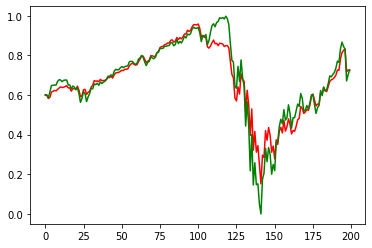

In [61]:
plt.plot(pred, color='r')
plt.plot(actual, color='g')

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [63]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)

In [65]:
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae, mape:" + str((mse,rmse,mae,mape)))

mse, rmse, mae, mape:(0.003320354118429762, 0.057622513989149776, 0.03839913437840675, inf)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
